In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats 
from scipy.stats import zscore
from scipy import stats 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, roc_auc_score, r2_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
print(df_train.shape)
print(df_test.shape)

(8523, 12)
(5681, 11)


In [5]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
#df_train has one extra column which is a target variable

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [11]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [12]:
#combining dataset of df_train & df_test

df=pd.concat([df_train,df_test])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

<AxesSubplot:>

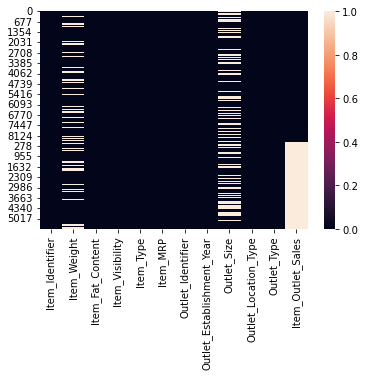

In [14]:
sns.heatmap(df.isnull())

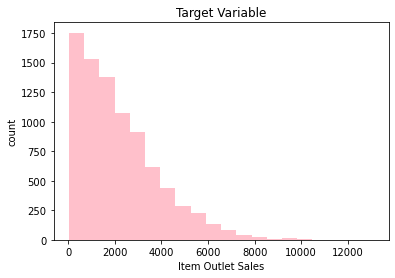

In [15]:
plt.hist(df_train['Item_Outlet_Sales'], bins = 20, color = 'pink')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

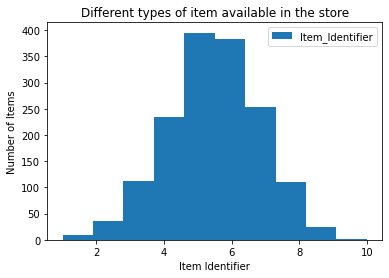

In [16]:
# we will analyze only the training set

df_train['Item_Identifier'].value_counts(normalize = True)
df_train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [17]:
#imputing missing values

imp=SimpleImputer(strategy='mean')
df['Item_Weight']=imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))

df['Item_Weight'].isnull().any()

False

In [18]:
imp=SimpleImputer(strategy='most_frequent')
df['Outlet_Size']=imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

df['Outlet_Size'].isnull().any()

False

<AxesSubplot:>

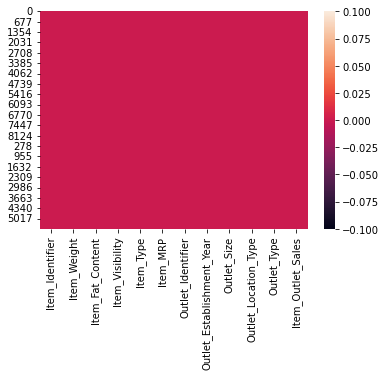

In [19]:
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].fillna(0)

sns.heatmap(df.isnull())

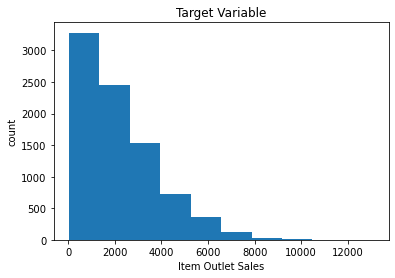

In [20]:
plt.hist(df_train['Item_Outlet_Sales'], bins = 10)
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

In [21]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

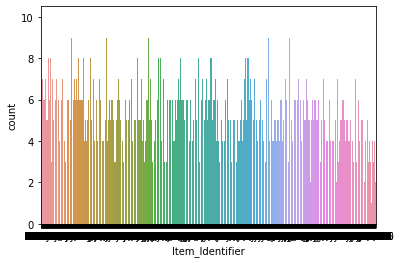

In [22]:
sns.countplot(df_train['Item_Identifier'])

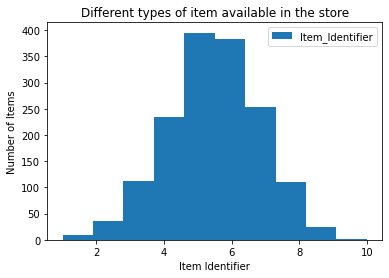

In [23]:
df_train['Item_Identifier'].value_counts(normalize = True)
df_train['Item_Identifier'].value_counts().plot.hist(bins=10)
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

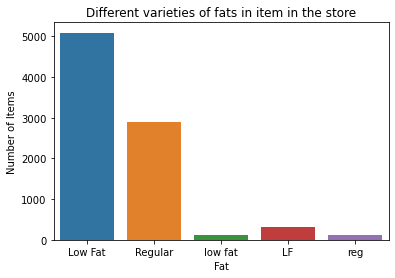

In [24]:
sns.countplot(df_train['Item_Fat_Content'])
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

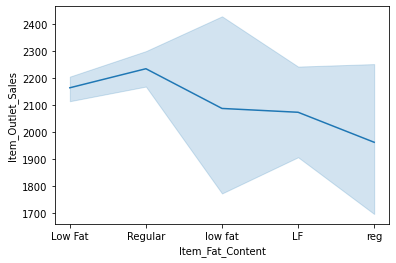

In [25]:
sns.lineplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df_train)

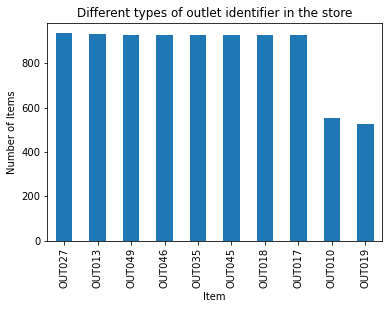

In [26]:
# we will analyze only the training set

df_train['Outlet_Identifier'].value_counts(normalize = True)
df_train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

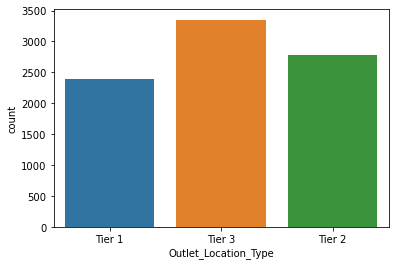

In [27]:
sns.countplot(df_train['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

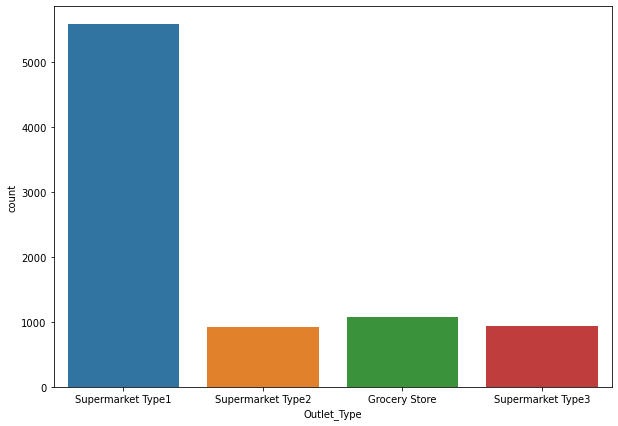

In [28]:
plt.figure(figsize=(10,7))

sns.countplot(df_train['Outlet_Type'])

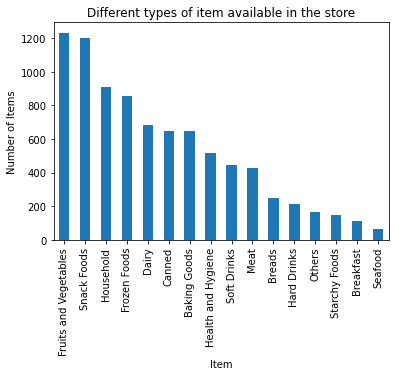

In [29]:
# we will analyze only the training set

df_train['Item_Type'].value_counts(normalize = True)
df_train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

<AxesSubplot:xlabel='Item_Type'>

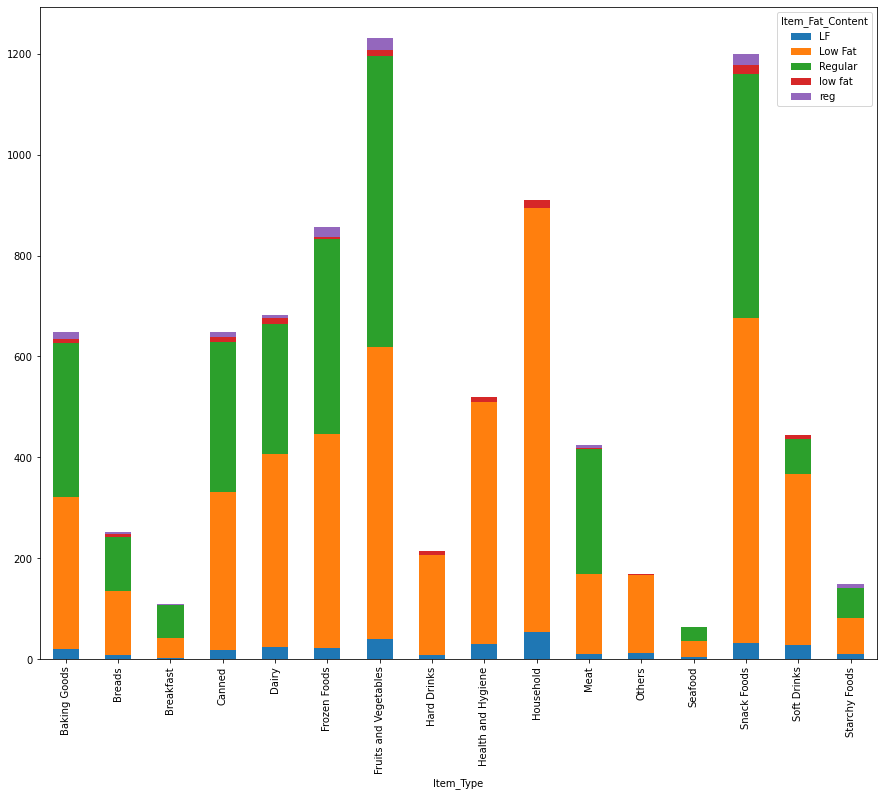

In [30]:
pd.crosstab(df_train['Item_Type'],df_train['Item_Fat_Content']).plot(kind="bar", stacked=True,figsize=(15,12))

In [31]:
df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [32]:
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[0:2])

df['Item_Identifier'] = df['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

df['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [33]:
df=df.drop('Item_Identifier',axis=1)

In [34]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [35]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Type'>

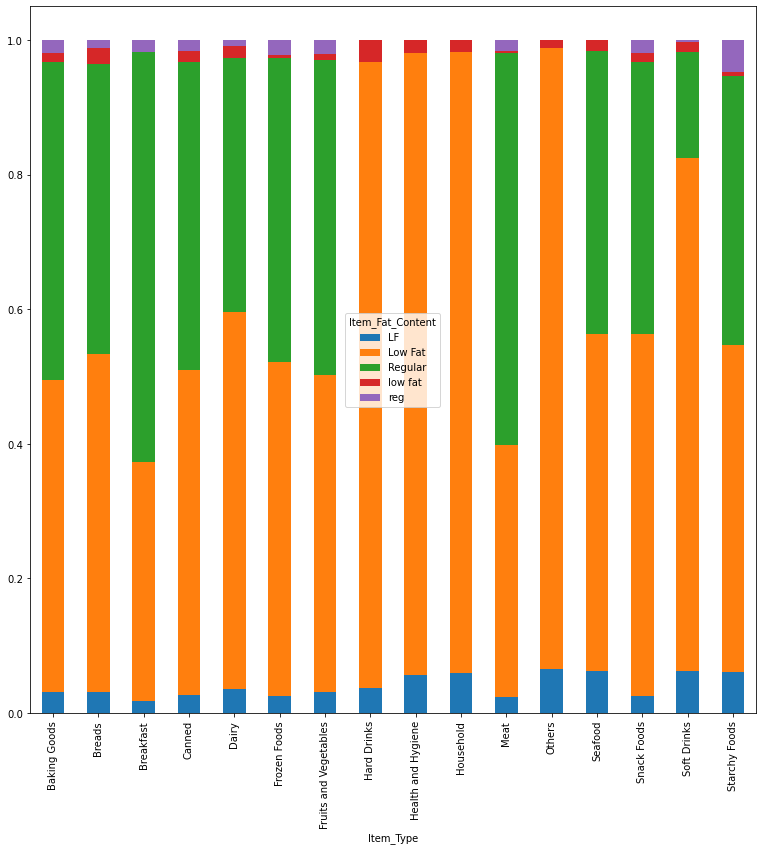

In [36]:
# fat content vs item type

Item_Type = pd.crosstab(df_train['Item_Type'],df_train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(13, 13))

In [37]:
df['Outlet_Years']=2013-df['Outlet_Establishment_Year']

df['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [38]:
le=LabelEncoder() 


list=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))
    
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,14
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,4
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,14
3,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,15
4,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,0.0000,16
5677,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,0.0000,4
5678,10.00,0,0.073529,8,118.7440,7,2002,1,1,1,0.0000,11
5679,15.30,1,0.000000,3,214.6218,2,2007,1,1,1,0.0000,6


In [39]:
#removing outliers

from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(14204, 12)
(13828, 12)


In [40]:
x=df.iloc[:,:-1]
y=pd.DataFrame(df['Item_Outlet_Sales'])

In [41]:
x.shape

(14204, 11)

In [42]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [43]:
y.shape

(14204, 1)

Modelling - Linear Regression

In [44]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    model=LinearRegression()
    model.fit(x_train,y_train)
    model_pred=model.predict(x_test)
    r2_scr=r2_score(y_test,model_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print('max r2 score corresponding to ',final_r_state,'is',max_r_score)

max r2 score corresponding to  42 is 1.0


In [45]:
#lets use cross validation to check overfiting or underfitting
a_score=cross_val_score(LinearRegression(),x,y,cv=5,scoring='r2')
a_score

array([1., 1., 1., 0., 0.])

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [47]:
# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

[[3.86535248e-12]
 [1.18246080e+03]
 [6.82121026e-13]
 ...
 [3.63797881e-12]
 [2.36092680e+03]
 [2.95585778e-12]]
RMSE : 2.3773038397398296e-12
Variance score: 1.00


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=96,test_size=.20)
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
model_pred

print("RMSE :", np.sqrt(mean_squared_error(y_test,model_pred)))

print("r2_score :",r2_score(y_test,model_pred))

RMSE : 8.472944535166825e-13
r2_score : 1.0


AdaBoost Regressor

In [49]:
model= AdaBoostRegressor(n_estimators = 100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

print("Result :",model.score(x_train, y_train))

RMSE : 149.5913342352737
Result : 0.992293861834714


Random Forest Regression

In [50]:
model = RandomForestRegressor(n_estimators = 100 )
model.fit(x_train, y_train)

y_pred = model.predict(x_test)



print('r2_score',r2_score(y_test,y_pred))
print('mean_squared_error',mean_squared_error(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))

r2_score 0.9999636055696552
mean_squared_error 104.09762575741684
mean_absolute_error 0.8389009693769904


XgBoost Regressor

In [51]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

print(model.score(x_train,y_train))
model_pred=model.predict(x_test)

0.9999486606049427


DecisionTreeRegressor

In [52]:
from sklearn.tree import DecisionTreeRegressor

dtc = DecisionTreeRegressor()
dtc.fit(x_train, y_train)

dtc_pred = model.predict(x_test)
print(dtc_pred)

print('r2_score',r2_score(y_test,dtc_pred))
print('mean_squared_error',mean_squared_error(y_test,dtc_pred))
print('mean_absolute_error',mean_absolute_error(y_test,dtc_pred))

[5.58764733e+02 3.49398439e-01 4.22008560e-01 ... 4.22008560e-01
 4.22008560e-01 1.29664256e+03]
r2_score 0.9998583420321308
mean_squared_error 405.17897890165966
mean_absolute_error 7.632457970503751


Support vector machine

In [53]:
model = SVR()
model.fit(x_train, y_train)

# predicting the x test results
y_pred = model.predict(x_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

RMSE : 1588.8589979437193


In [54]:
import joblib

joblib.dump(model_pred,'model_predfile.obj')

['model_predfile.obj']